In [1]:
import glob
import numpy as np
import cv2
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

In [2]:
# set the image folder location to '../<Project Folder>' and the name to 'data_vehicledetection'

test_images_location = glob.glob('test_images/*.jpg')
vehicle_images_location = glob.glob('../data_vehicledetection/vehicles/*/*.png')
non_vehicle_images_location = glob.glob('../data_vehicledetection/non-vehicles/*/*.png')

#print(vehicle_images_location)

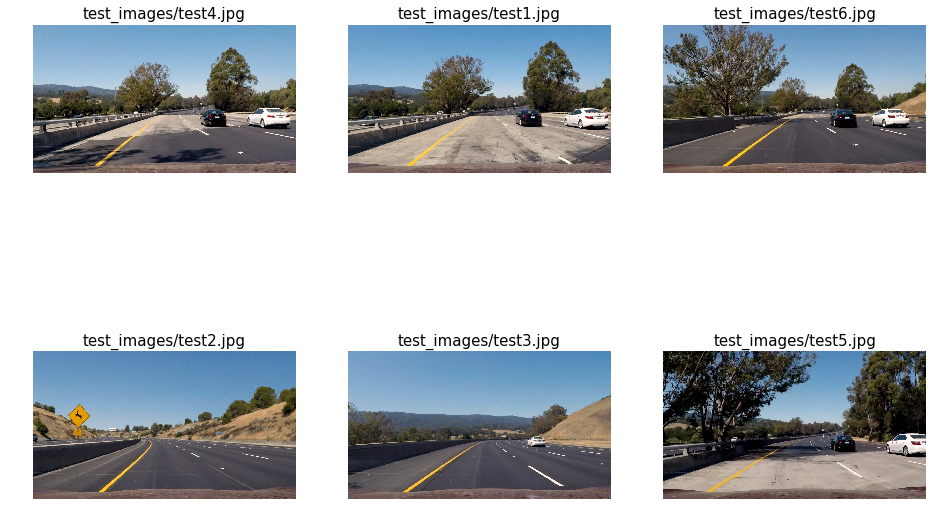

In [4]:
# Display raw images

fig, axs = plt.subplots(2,3, figsize=(16, 11))
axs = axs.ravel()

for i, vil in enumerate(test_images_location):
    image = mpimg.imread(vil)
    axs[i].set_title(vil, fontsize=15)
    axs[i].axis('off')
    axs[i].imshow(image)

In [5]:
def draw_boxes(img, bboxes, color=(0, 0, 255), thick=6):
    # Make a copy of the image
    imcopy = np.copy(img)
    # Iterate through the bounding boxes
    for bbox in bboxes:
        # Draw a rectangle given bbox coordinates
        cv2.rectangle(imcopy, bbox[0], bbox[1], color, thick)
    # Return the image copy with boxes drawn
    return imcopy

def find_matches(img, template_list):
    # Define an empty list to take bbox coords
    bbox_list = []
    # Define matching method
    # Other options include: cv2.TM_CCORR_NORMED', 'cv2.TM_CCOEFF', 'cv2.TM_CCORR',
    #         'cv2.TM_SQDIFF', 'cv2.TM_SQDIFF_NORMED'
    method = cv2.TM_CCOEFF_NORMED
    # Iterate through template list
    for temp in template_list:
        # Read in templates one by one
        tmp = mpimg.imread(temp)
        # Use cv2.matchTemplate() to search the image
        result = cv2.matchTemplate(img, tmp, method)
        # Use cv2.minMaxLoc() to extract the location of the best match
        min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(result)
        # Determine a bounding box for the match
        w, h = (tmp.shape[1], tmp.shape[0])
        if method in [cv2.TM_SQDIFF, cv2.TM_SQDIFF_NORMED]:
            top_left = min_loc
        else:
            top_left = max_loc
        bottom_right = (top_left[0] + w, top_left[1] + h)
        # Append bbox position to list
        bbox_list.append((top_left, bottom_right))
        # Return the list of bounding boxes
        
    return bbox_list

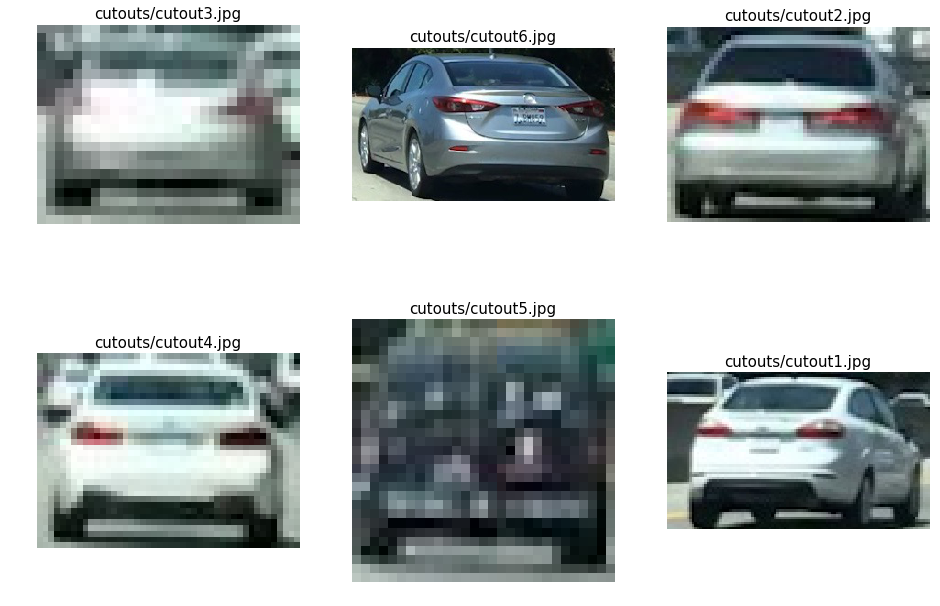

In [12]:
fig, axs = plt.subplots(2,3, figsize=(16, 11))
axs = axs.ravel()

templates_list = glob.glob('cutouts/cutout*.jpg')

# display Cutout Images
for i, vil in enumerate(templates_list):
    image = mpimg.imread(vil)
    axs[i].set_title(vil, fontsize=15)
    axs[i].axis('off')
    axs[i].imshow(image)

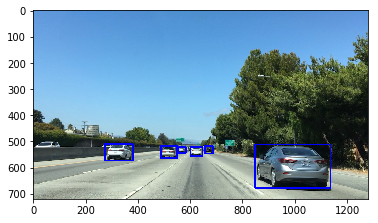

In [15]:
# display match finding result
example = glob.glob('cutouts/bbox*.jpg')

image = mpimg.imread(example[0])
bboxes = find_matches(image, templates_list)
result = draw_boxes(image, bboxes)

plt.imshow(result)